Successfully loaded dataset housing-and-development-board-resale-price-index-1q2009-100-quarterly.csv from sql database

Data saved!
Data loaded!


Loading BokehJS ...


***Median Rent by Town and Flat type***

There are 8313 rows and 4 columns of data in this dataset median-rent-by-town-and-flat-type.csv

The names of the columns are:
('quarter', 'town', 'flat_type', 'median_rent')

53 unique values in quarter column
181 unique values in median_rent column

The mean of the median_rent over all the quarters is 907
The highest amount of the median_rent was in the quarter 2016-Q3 with 3600 
The standard deviation is 1061


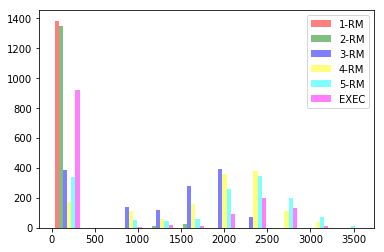

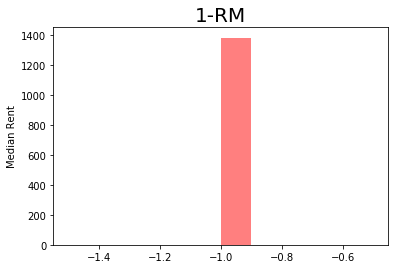

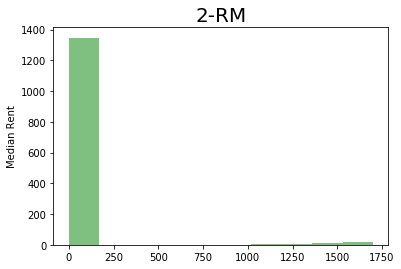

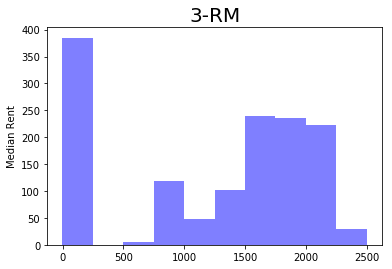

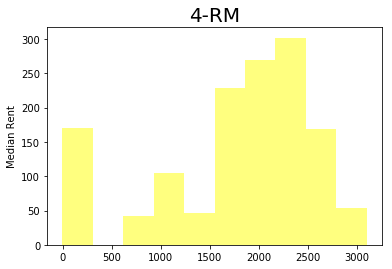

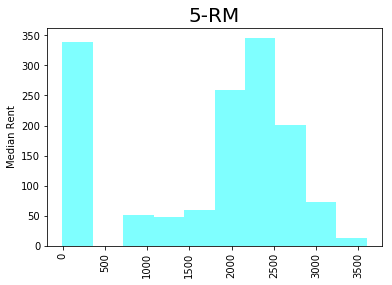

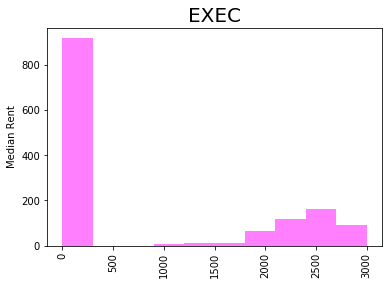

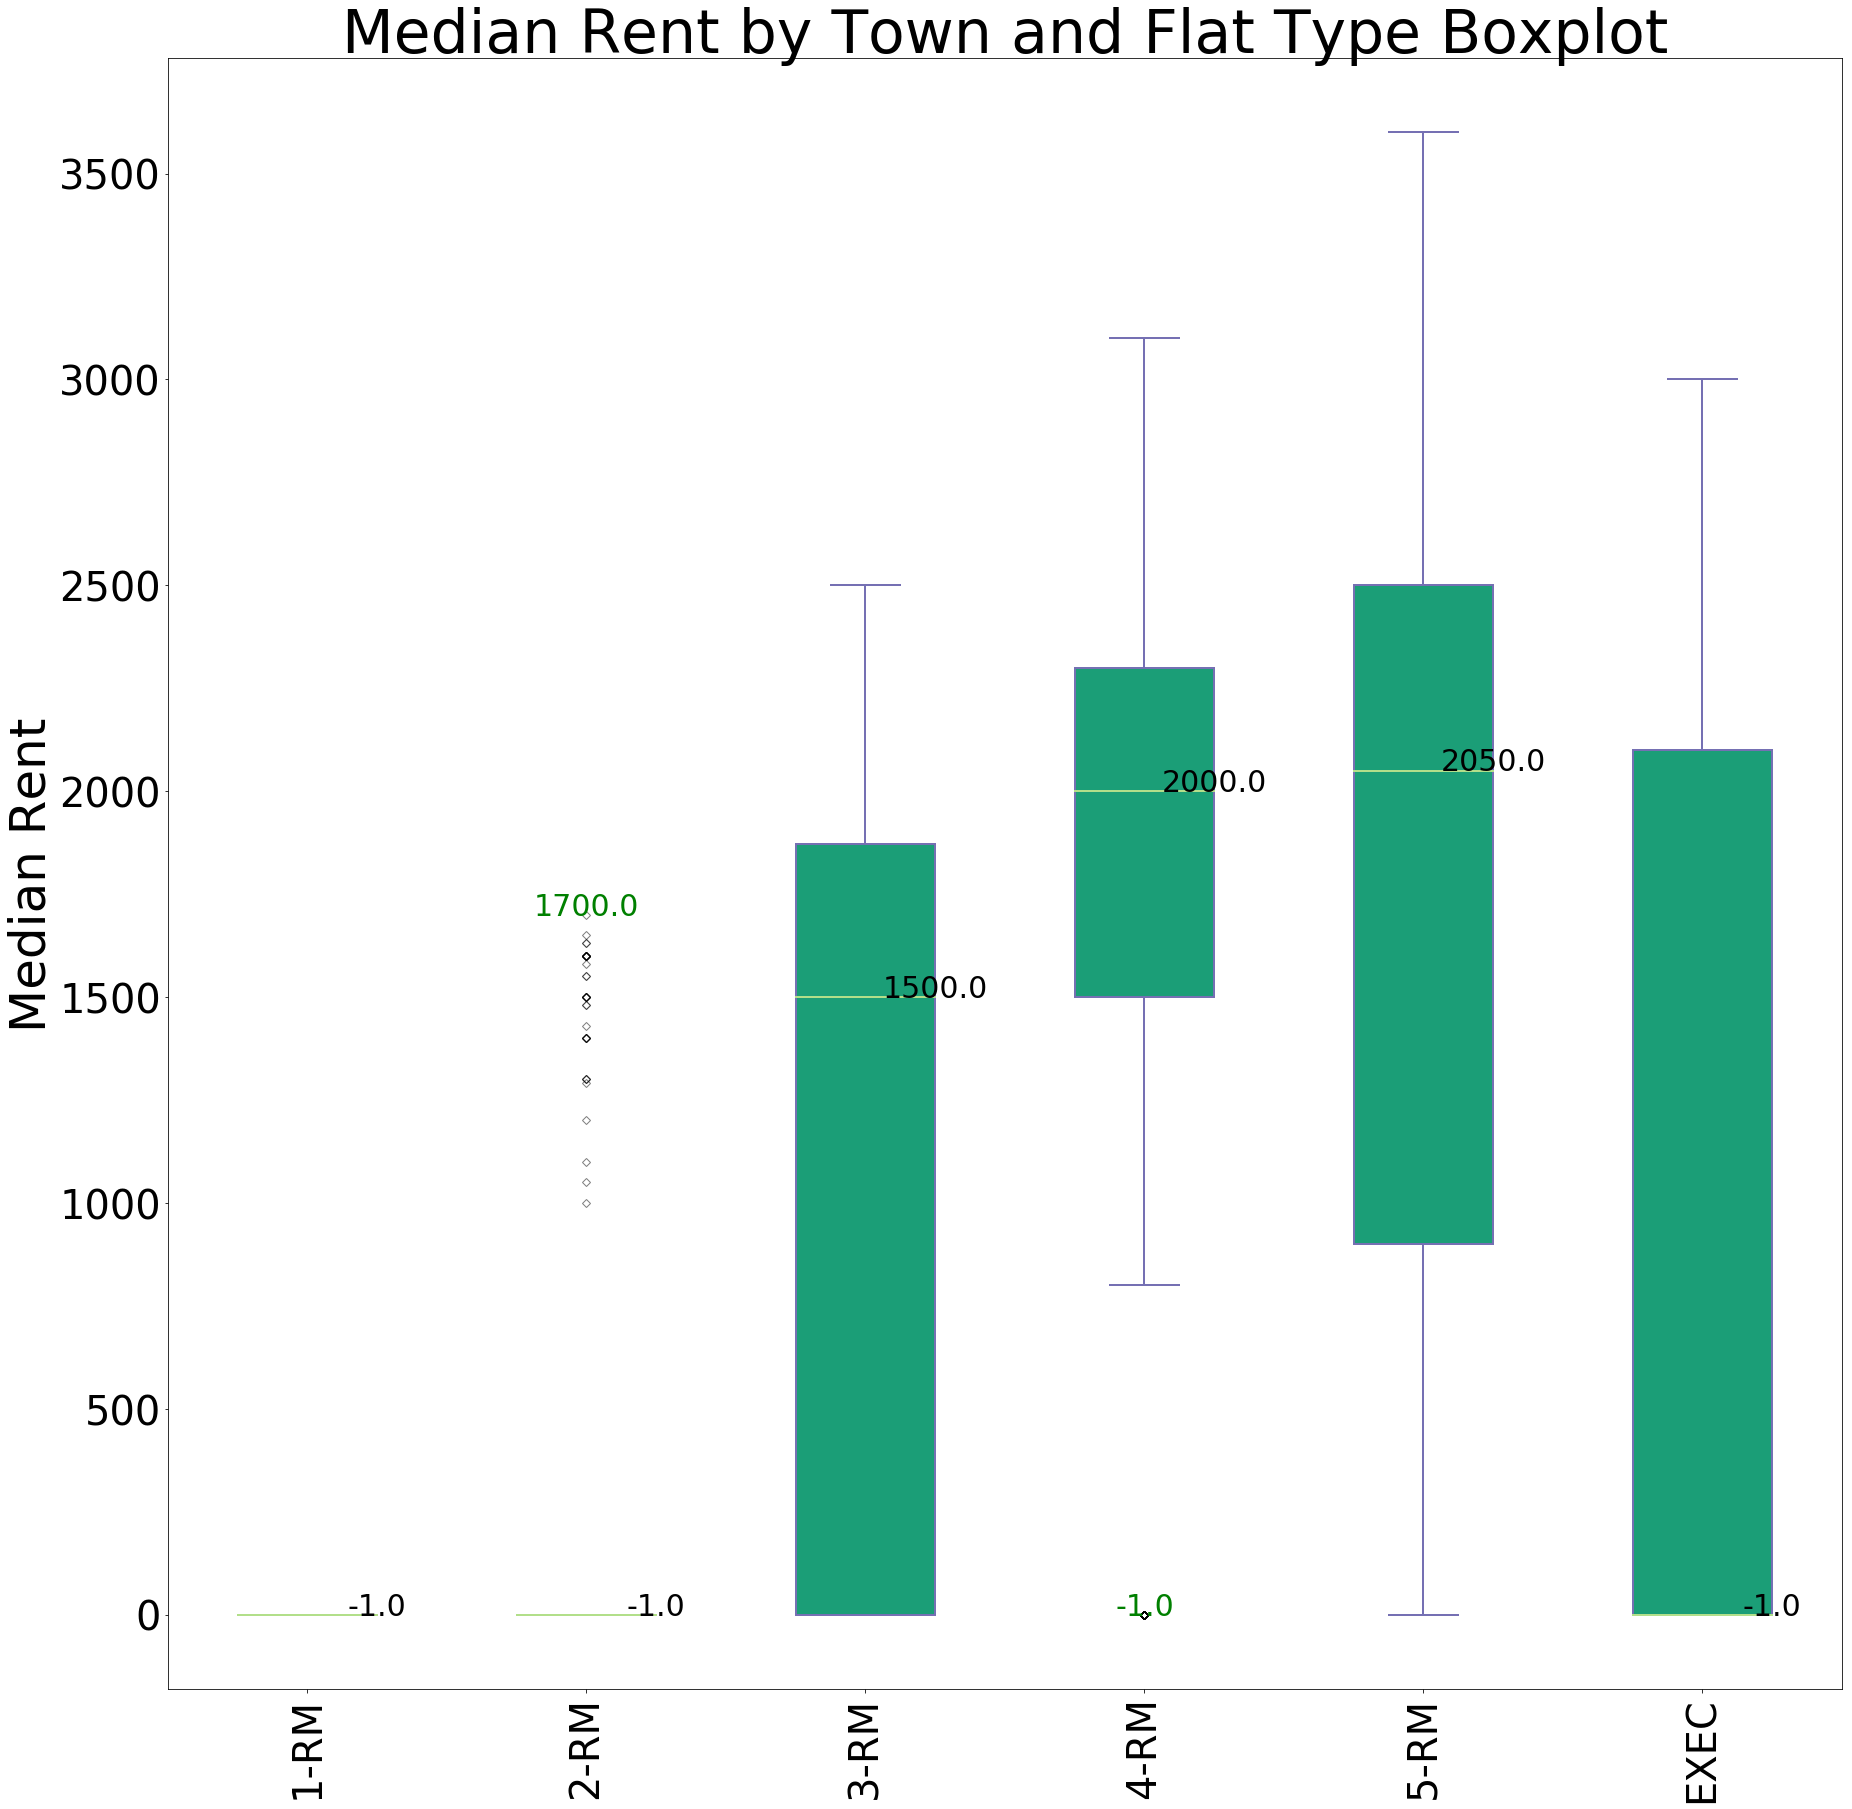

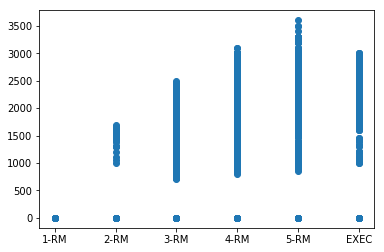

Successfully loaded dataset housing-and-development-board-resale-price-index-1q2009-100-quarterly.csv from sql database

Data saved!
Data loaded!
This is the shape of the dataset (73819, 11)

This is the index of the dataset RangeIndex(start=0, stop=73819, step=1)

These are the columns in the dataset
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease          int64
resale_price           float64
dtype: object

The total number of non-NA values in this dataset is:
month                  73819
town                   73819
flat_type              73819
block                  73819
street_name            73819
storey_range           73819
floor_area_sqm         73819
flat_model             73819
lease_commence_date    73819
remaining_lease        738

Loading BokehJS ...

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector,sys, pandas as pd
from datetime import date, datetime, timedelta
from dateutil.parser import parse
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from pandas.io import sql
import sqlite3

### Read the hdb resale price index csv file with the pandas readcsv() function
hdbrpi = pd.read_csv('housing-and-development-board-resale-price-index-1q2009-100-quarterly.csv', 
                   index_col=None, delimiter=',')
#user,pw, host,db = 'root','S8534107c!','127.0.0.1','mydatabase'
#cnx = mysql.connector.connect(user=user, password=pw, host=host, database=db)
con = sqlite3.connect('mydatabase.db')
#cursor = cnx.cursor()
print("Successfully loaded dataset housing-and-development-board-resale-price-index-1q2009-100-quarterly.csv from sql database")
print()

query_for_creating_database = 'CREATE DATABASE mydatabase'
query_for_creating_table = ("CREATE TABLE `table_hdbrpi` ("
    "`quarter` varchar(10) NOT NULL,"
    "`index` int(11) NOT NULL,"
    "PRIMARY KEY (`quarter`)"
    ") ENGINE=InnoDB")

try:
#     cursor.execute(query_for_creating_database)
#     cursor.execute(query_for_creating_table)
    
    hdbrpi.to_sql(name='table_hdbrpi', con=con, if_exists='replace', index=False)
    #cnx.commit()
    print("Data saved!")
    #engine.execute("SELECT * FROM table_hdbrpi").fetchall()
    pull_hdbrpi = pd.read_sql("SELECT * FROM table_hdbrpi;", con=con)
    #print(pull_hdbrpi)
    print("Data loaded!")

except:
    print("Unexpected error:", sys.exc_info()[0])
    print("Unexpected error:", sys.exc_info()[1])
    print("Unexpected error:", sys.exc_info()[2])
    exit()


#cursor.close()
#cnx.close()
    print("This is the shape of the dataset", pull_hdbrpi.shape)
    print()
    print("This is the index of the dataset", pull_hdbrpi.index)
    print()
    print("These are the columns in the dataset")
    print(pull_hdbrpi.dtypes)
    print()
    print("The total number of non-NA values in this dataset is:")
    print(pull_hdbrpi.notna().sum())
    print()
    print("A summary of this dataset is shown below:")
    print(pull_hdbrpi.info(verbose=True))
    print()
    print("A descriptive statistical summary of this dataset is shown below:")
    print(pull_hdbrpi.describe())
    print()

# hdb resale price index linechart
# output to static HTML file
output_notebook()
x = list(range(1, 115))
y = pull_hdbrpi.iloc[:,1]

# create a new plot with a title and axis labels
p = figure(plot_width=400, plot_height=400, title="HDB Resale Price Index Linechart", x_axis_label='Quarter', y_axis_label='Index')
# add a line renderer with legend and line thickness
p.line(x, y, line_width=2)

# show the results
show(p)



### Read the median rent by town and flat type csv file with the genfromtxt() function
medianrent = "median-rent-by-town-and-flat-type.csv"
data3 = np.genfromtxt(medianrent, dtype=[('quarter', 'U50'), ('town', 'U50'), ('flat_type', 'U50'), ('median_rent', 'i8')], delimiter=',', names=True, encoding=None)

### Print out total rows and columns of data in the file
print()
print("***Median Rent by Town and Flat type***")
print()
print(f"There are {len(data3)} rows and {len(data3[0])} columns of data in this dataset {medianrent}")
print()

### Print out the names of the columns in the file
print("The names of the columns are:")
print(data3.dtype.names)
print()

### Print out the unique values of the columns in the file
set_quarter = set(data3['quarter'])
set_medianrent = set(data3['median_rent'])
print(str(len(set_quarter)) + " unique values in quarter column")
print(str(len(set_medianrent)) + " unique values in median_rent column")

### Print out the max, min, sd of the columns in the file
max_value = np.max(data3['median_rent'])      
max_row_index = np.argmax(data3['median_rent'])
std = np.std(data3['median_rent'])

print()
print("The mean of the median_rent over all the quarters is {:.0f}".format(np.mean(data3['median_rent'])))
print("The highest amount of the median_rent was in the quarter {} with {:.0f} ".format(data3[max_row_index][0],data3[max_row_index][3]))
print("The standard deviation is {:.0f}".format(std))

# median rent by town and flat type histogram with new code
labels = list(set(data3['flat_type']))
labels = ['1-RM','2-RM','3-RM','4-RM','5-RM','EXEC']
levels = np.arange(0,len(labels))
levels_values = data3[['flat_type','median_rent']]

values = levels_values['median_rent']
values_1RM = values[levels_values ['flat_type'] == '1-RM']
values_2RM = values[levels_values['flat_type'] == '2-RM']
values_3RM = values[levels_values['flat_type'] == '3-RM']
values_4RM = values[levels_values['flat_type'] == '4-RM']
values_5RM = values[levels_values ['flat_type'] == '5-RM']
values_EXEC = values[levels_values ['flat_type'] == 'EXEC']

values_combined =[values_1RM,
                            values_2RM,
                            values_3RM,
                            values_4RM,
                            values_5RM,
                            values_EXEC]


plt.figure(1) # first figure
hist_all = plt.hist(values_combined,
         alpha=0.5, 
         color=['red','green','blue','yellow','cyan','magenta'],
         label=labels)

plt.legend()

plt.figure(2) # second figure
plt.hist(values_1RM,  
         alpha=0.5, 
         color=['red'])
plt.title("1-RM",fontsize=20)
plt.ylabel('Median Rent',fontsize=10)

plt.figure(3) # second figure
plt.hist(values_2RM,  
         alpha=0.5, 
         color=['green'])
plt.title("2-RM",fontsize=20)
plt.ylabel('Median Rent',fontsize=10)

plt.figure(4) # second figure
plt.hist(values_3RM,  
         alpha=0.5, 
         color=['blue'])
plt.title("3-RM",fontsize=20)
plt.ylabel('Median Rent',fontsize=10)

plt.figure(5) # second figure
plt.hist(values_4RM,  
         alpha=0.5, 
         color=['yellow'])
plt.title("4-RM",fontsize=20)
plt.ylabel('Median Rent',fontsize=10)


plt.figure(6) # second figure
plt.hist(values_5RM,  
         alpha=0.5, 
         color=['cyan'])
plt.title("5-RM",fontsize=20)
plt.ylabel('Median Rent',fontsize=10)
plt.xticks(rotation='vertical')

plt.figure(7) # second figure
plt.hist(values_EXEC,  
         alpha=0.5, 
         color=['magenta'])
plt.title("EXEC",fontsize=20)
plt.ylabel('Median Rent',fontsize=10)
plt.xticks(rotation='vertical')

plt.show()


# median rent by town and flat type boxplot with new code
data5 = np.genfromtxt(medianrent, dtype=[('quarter', 'U50'), ('town', 'U50'), ('flat_type', 'U50'), ('median_rent', 'i8')], delimiter=',', names=True, encoding=None)
labels = list(set(data5['flat_type']))
labels.sort()
#print(labels)
levels = np.arange(0,len(labels))
levels_values = data5[['flat_type','median_rent']]

values = levels_values['median_rent']

values_1RM = values[levels_values ['flat_type'] == '1-RM']
values_2RM = values[levels_values['flat_type'] == '2-RM']
values_3RM = values[levels_values['flat_type'] == '3-RM']
values_4RM = values[levels_values['flat_type'] == '4-RM']
values_5RM = values[levels_values ['flat_type'] == '5-RM']
values_EXEC = values[levels_values ['flat_type'] == 'EXEC']

values_combined =[values_1RM,
                            values_2RM,
                            values_3RM,
                            values_4RM,
                            values_5RM,
                            values_EXEC]



plt.figure(2, figsize=(30,30))
plt.title('Median Rent by Town and Flat Type Boxplot',fontsize=60)
plt.ylabel('Median Rent',fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(fontsize=40,rotation='vertical')
bp_dict = plt.boxplot(values_combined,labels=labels,patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp_dict['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp_dict['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp_dict['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp_dict['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp_dict['fliers']:
    flier.set(marker='D', color='#e7298a', alpha=0.5)



for line in bp_dict['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    plt.text(x, y, '%.1f' % y,
         horizontalalignment='center',fontsize=30) # draw above, centered

fliers = []
for line in bp_dict['fliers']:
    ndarray = line.get_xydata()
    if (len(ndarray)>0):
       max_flier = ndarray[:,1].max()
       max_flier_index = ndarray[:,1].argmax()
       x = ndarray[max_flier_index,0]
       #print("Flier: " + str(x) + "," + str(max_flier))

       plt.text(x,max_flier,'%.1f' % max_flier,horizontalalignment='center',fontsize=30,color='green') 

plt.show()

#Scatterplot chart
scatter_all = plt.scatter(x=data5['flat_type'],y=data5['median_rent']   )
plt.show()

### Read the hdb resale price index csv file with the pandas readcsv() function
resaleflatprices = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-onwards.csv', 
                   index_col=None, delimiter=',')
#user,pw, host,db = 'root','S8534107c!','127.0.0.1','mydatabase'
#cnx = mysql.connector.connect(user=user, password=pw, host=host, database=db)
#cursor = cnx.cursor()
con = sqlite3.connect('mydatabase.db')
print("Successfully loaded dataset housing-and-development-board-resale-price-index-1q2009-100-quarterly.csv from sql database")
print()

query_for_creating_database = 'CREATE DATABASE mydatabase'
query_for_creating_table = ("CREATE TABLE `table_resaleflatprices` ("
    "`flattype` varchar(20) NOT NULL,"
    "`resaleprice` int(11) NOT NULL,"
    "PRIMARY KEY (`flattype`)"
    ") ENGINE=InnoDB")

try:
    #cursor.execute(query_for_creating_database)
    #cursor.execute(query_for_creating_table)
    
    resaleflatprices.to_sql(name='table_resaleflatprices', con=con, if_exists='replace', index=False)
    #cnx.commit()
    print("Data saved!")
    pull_resaleflatprices = pd.read_sql("SELECT * FROM table_resaleflatprices;", con=con)
    #print(pull_resaleflatprices)
    print("Data loaded!")

except:
    print("Unexpected error:", sys.exc_info()[0])
    print("Unexpected error:", sys.exc_info()[1])
    print("Unexpected error:", sys.exc_info()[2])
    exit()

print("This is the shape of the dataset", pull_resaleflatprices.shape)
print()
print("This is the index of the dataset", pull_resaleflatprices.index)
print()
print("These are the columns in the dataset")
print(pull_resaleflatprices.dtypes)
print()
print("The total number of non-NA values in this dataset is:")
print(pull_resaleflatprices.notna().sum())
print()
print("A summary of this dataset is shown below:")
print(pull_resaleflatprices.info(verbose=True))
print()
print("A descriptive statistical summary of this dataset is shown below:")
print(pull_resaleflatprices.describe())
print()

re1 = '^1[Room]$' #Match strings with 1 Room
re2 = '^2[Room]$' #Match strings with 2 Room
re3 = '^3[Room]$' #Match strings with 3 Room
re4 = '^4[Room]$' #Match strings with 4 Room
re5 = '^5[Room]$' #Match strings with 5 Room

df1 = resaleflatprices.filter(regex=re1)
df2 = resaleflatprices.filter(regex=re2)
df3 = resaleflatprices.filter(regex=re3)
df4 = resaleflatprices.filter(regex=re4)
df5 = resaleflatprices.filter(regex=re5)

# create a scatterplot 
#import seaborn as sns

#cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
#ax = sns.scatterplot(x=resaleflatprices['flat_type'],y=resaleflatprices['resale_price'] )


# hdb resale flat prices barchart
# output to static HTML file
output_notebook()

re1 = '^1[Room]$' #Match strings with 1 Room
re2 = '^2[Room]$' #Match strings with 2 Room
re3 = '^3[Room]$' #Match strings with 3 Room
re4 = '^4[Room]$' #Match strings with 4 Room
re5 = '^5[Room]$' #Match strings with 5 Room

df1 = resaleflatprices.filter(regex=re1)
df2 = resaleflatprices.filter(regex=re2)
df3 = resaleflatprices.filter(regex=re3)
df4 = resaleflatprices.filter(regex=re4)
df5 = resaleflatprices.filter(regex=re5)

df1rm = resaleflatprices.groupby(by='flat_type')

df1rm.describe()

Grp = resaleflatprices.groupby(['flat_type','resale_price'])
Grp.aggregate(['min', np.median, max])
#grouped.get_group('bar')
#resaleflatprices.groupby(['A', 'B']).get_group(('bar', 'one'))

x = pull_resaleflatprices.iloc[:,1]
y = pull_resaleflatprices.iloc[:,10]

# create a new bar chart with a title and axis labels
p = figure(plot_width=400, plot_height=400, title="HDB Resale Flat Prices Barchart", x_axis_label='Flat Type', y_axis_label='Resale Flat Prices')
# add a line renderer with legend and line thickness
p.vbar(x=None, top=y, legend="Temp.", width=2)

# show the results
show(p)





